## Importing the Halo Pipeline
The first line of code is an import statement, it brings in the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

For this jupyter notebook, the pipeline is generated from the YAML file, halo.yml. The default setting can be checked in readme.md in the data/Skypy folder.

In [1]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline(sky_area=0.0001,m_max='1.0E+16',m_min='1.0E+12',z_max=5.00)

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

In [2]:
halos= pipeline.halos
print(halos)

        z                 mass           first_moment   
------------------ ------------------ ------------------
 1.441393633925356 1330190593957.9006 1957751043380.8716
 0.595301903236331    4624667277123.9 2107030933576.8591
3.2259149172658117 1027360082981.0494  1670571847599.333
3.3641004371530463 1482888868152.7769 1652134862884.3765
 3.679899798751674  2423202725986.951  1612092429934.925
2.7084521065600042 1648058182168.8625 1744769037652.9182
2.8080982749026417 1642514151286.6816  1729849138592.055
1.3753462956684432 10949126275112.236 1969695941076.7175
3.5353556860256083 1210133047955.1743 1630028057693.6802
 2.823323584997109  4564352792524.392 1727589881216.8406
               ...                ...                ...
 4.862674280904716  5546607397160.361  1486051251274.471
0.8420098624111095 1255513846138.9858 2065209870102.4968
 3.316116305256607  4128968427642.449   1658451884186.49
  1.88878400513659  6696519713122.903 1878370666548.3386
3.9515099412647645  88498032869

## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence $ \kappa $ and shear $ \gamma_1$, $\gamma_2 $ (or shear $\gamma_{tot}$) at the origin due to all the halos.

In [3]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.Halos.halos_lens import HalosLens
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(halos_list=halos, sky_area=0.0001,cosmo=cosmo, samples_number= 10000)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa,gamma1,gamma2 = halos_lens.get_convergence_shear(gamma12=True) #when gamma12=False,return kappa,gamma_tot
print('kappa at center is: ',kappa)
print('gamma1 at center is: ',gamma1)
print('gamma2 at center is: ',gamma2)

kappa at center is:  0.9416070769406113
gamma1 at center is:  -0.01001818472981797
gamma2 at center is:  0.01347015935209983


### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [4]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True, diff=None)
print(kappa_gamma_distribution)

For this Halos list, elapsed time for computing weak-lensing maps: 21.663437366485596 seconds
[[0.9293895  0.01103076]
 [1.01003796 0.03853604]
 [0.94158627 0.0138877 ]
 ...
 [0.98037864 0.04731841]
 [0.93285025 0.02100286]
 [0.91863739 0.01851419]]


### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

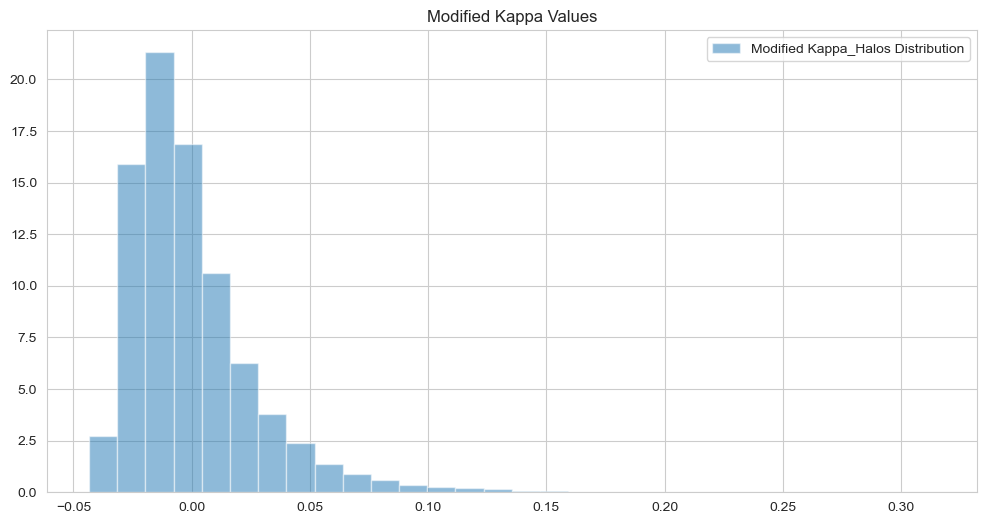

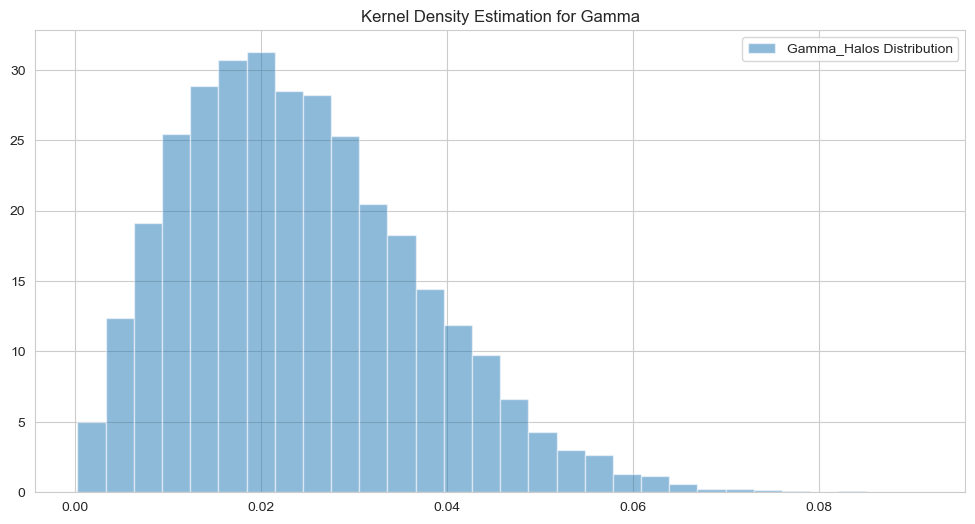

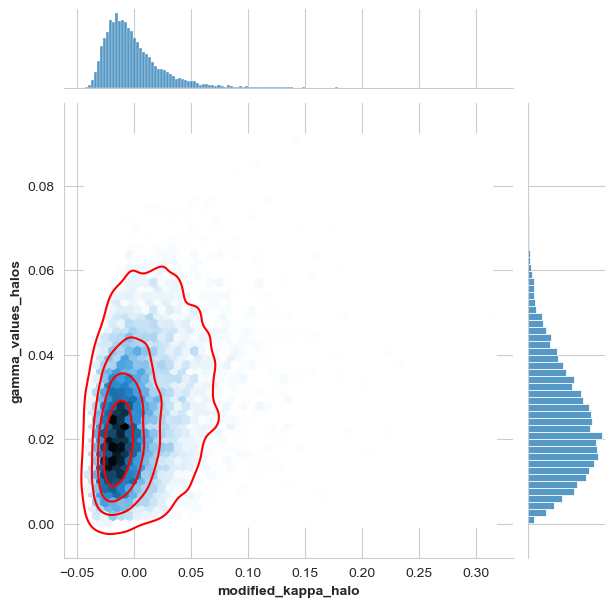

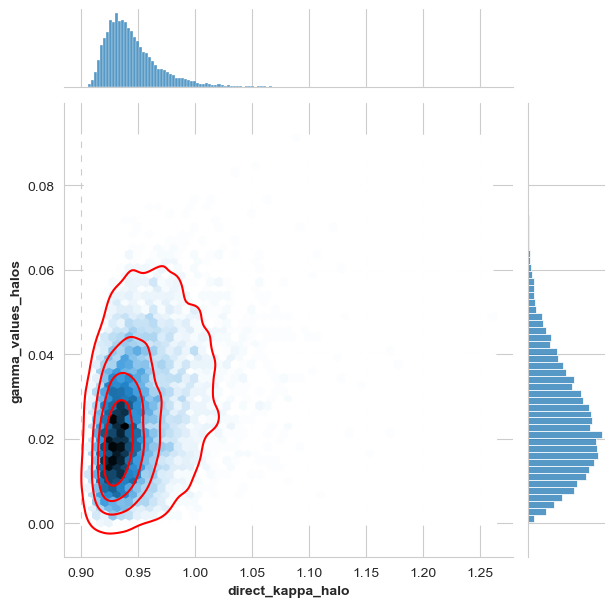

Spearman correlation coefficient:  0.2908127675201277
Kendall Tau correlation coefficient:  0.19607704770477047


In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
kappa_gamma_distribution = np.array(kappa_gamma_distribution)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

plt.figure(figsize=(12, 6))
plt.hist(modified_kappa_halos, bins=30, density=True, alpha=0.5, label='Modified Kappa_Halos Distribution')
plt.title('Modified Kappa Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(gamma_values_halos, bins=30, density=True, alpha=0.5, label='Gamma_Halos Distribution')
plt.title(f'Kernel Density Estimation for Gamma')
plt.legend()
plt.show()

import seaborn as sns
modified_plot = sns.jointplot(x=modified_kappa_halos, y=gamma_values_halos,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('modified_kappa_halo', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

unmodified_plot = sns.jointplot(x=kappa_values_halos, y=gamma_values_halos,kind='hex')
unmodified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
unmodified_plot.ax_joint.set_xlabel('direct_kappa_halo', fontweight='bold')
unmodified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

from scipy.stats import spearmanr, kendalltau
print('Spearman correlation coefficient: ', spearmanr(modified_kappa_halos, gamma_values_halos)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(modified_kappa_halos, gamma_values_halos)[0])

Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

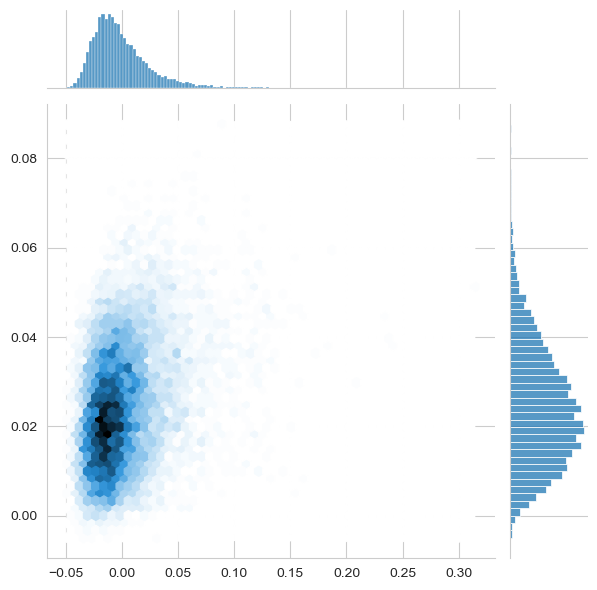

In [6]:
import seaborn as sns
kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind='hex')
plt.show()

# Run the method ` run_halos_without_kde()` to obtain kappa and gamma values without using KDE.

 This will generate ` n_iterations` sets of halo lists under the specified `sky_area`.
 For each set, it will simulate `samples_number` times to get the kappa and gamma values
 at the origin. The obtained values will be directly appended without any additional processing.

In [ ]:
from sim_pipeline.Halos.halos_plus_glass import run_halos_without_kde
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
import warnings

nk,ng = run_halos_without_kde(n_iterations=20, sky_area=0.0001, samples_number=10,cosmo=FlatLambdaCDM(H0=70, Om0=0.3),                                         m_min=None, m_max=None, z_max=None)


Visualization of ` run_halos_without_kde()`

In [ ]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
modified_plot = sns.jointplot(x=nk, y=ng,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('unmodified_kappa_100lists', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_500lists', fontweight='bold')
plt.show()
print('Spearman correlation coefficient: ', spearmanr(nk, ng)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(nk, ng)[0])